# Implementation of a Simple KMeans Model

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = data.iloc[:, [3,4]].values

Now to find the optimal number of clusters we use the **Within Clusters Sum of Squares** (WCSS).  
The formula for calculating WCSS is:

![wcss](wcss.png)

It calculates the sum of squared distances of all the points assigned to the cluster. Lower the sum better the optimality in choosing clusters. However we don't go for the number of clusters corresponding to the minimum. 

In [7]:
wcss = []

In [8]:
from sklearn.cluster import KMeans

In [9]:
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Text(0.5,1,'Within Clusters Sum of Squares')

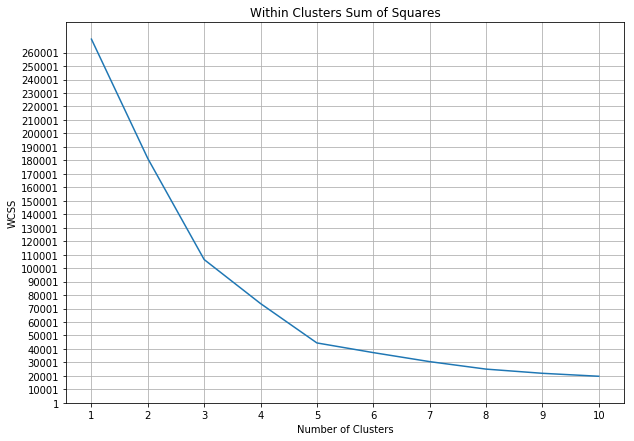

In [17]:
plt.figure(figsize= (10,7))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.yticks(np.arange(1, max(wcss), 10000))
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Within Clusters Sum of Squares')

We can observe in the above plot that with the increase in the number of clusters teh WCSS score is decreasing.  
The generally used optimal way of choosing the number of clusters is the *Elbow Method*.    


As in the above plot we can see that there is a significant drop in WCSS at number of clusters = 3 and at 5. We choose the number which forms the elbow like structure in the plot which in this case is 5.